### Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
print('Shape of the data',df.shape)
df.head(),df.tail()

Shape of the data (42, 2)


(  Quarter        Sales
 0   Q1_86  1734.827000
 1   Q2_86  2244.960999
 2   Q3_86  2533.804993
 3   Q4_86  2154.962997
 4   Q1_87  1547.818996,
    Quarter   Sales
 37   Q2_95  4936.0
 38   Q3_95  4895.0
 39   Q4_95  4333.0
 40   Q1_96  4194.0
 41   Q2_96  5253.0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
# Converting Quarters into Years
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
df.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [8]:
# Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)
df['Date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [9]:
# Extracting the Quarters
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]
    
df.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


### <font color='purple'><b>Get dummies for Quarters :

In [10]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

df1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [11]:
# Drop the unnecessary column
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [12]:
# Making the Date as DateTime index for the Dataframe 
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [13]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


In [14]:
# Separating month and date into separate column
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


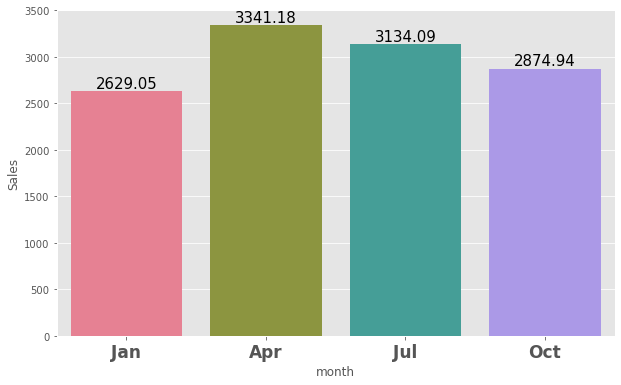

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,x='month',y='Sales',palette='husl',ci=None)
plt.xticks(fontsize=17,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

## <font color='purple'><b>Line plot :

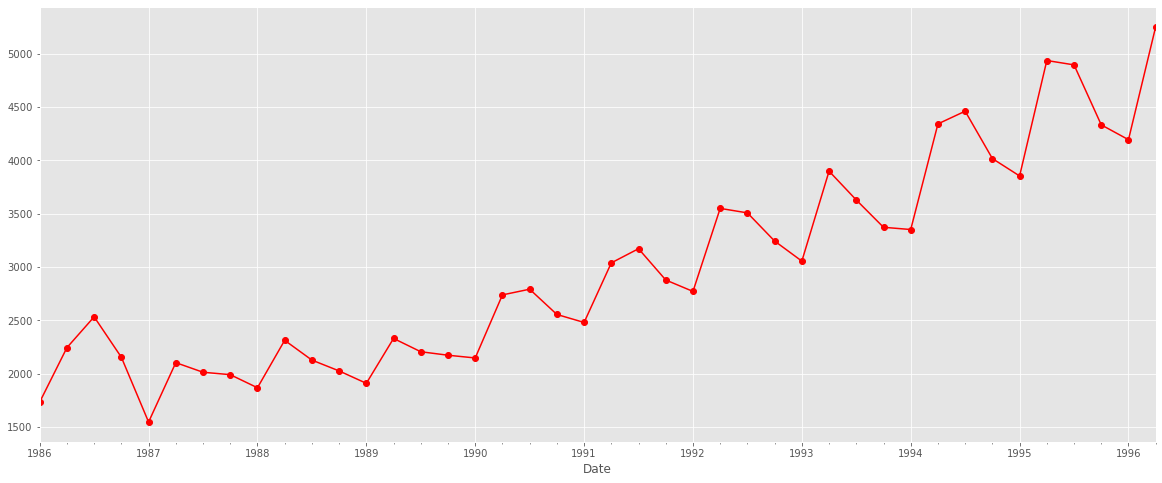

In [22]:
df1['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

<font color='maroon'><b><I>The time series plot has increasing secular trend and there are seasonal patterns seen.
<font color='maroon'><b><I>For the time series forecasting the data has to be stationary for which the statistical properties are more or less same over time, like
    
<font color='maroon'><b> 1) Constant Mean

<font color='maroon'><b>2) Constant Variance
     
<font color='maroon'><b>3) No Seasonality

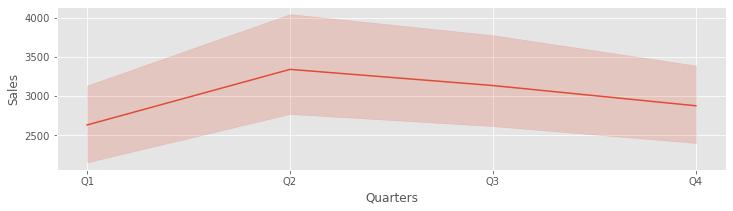

In [23]:
#Line Plot Using Quarters as Y axis and Sales as X axis
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarters", y="Sales", data=df);

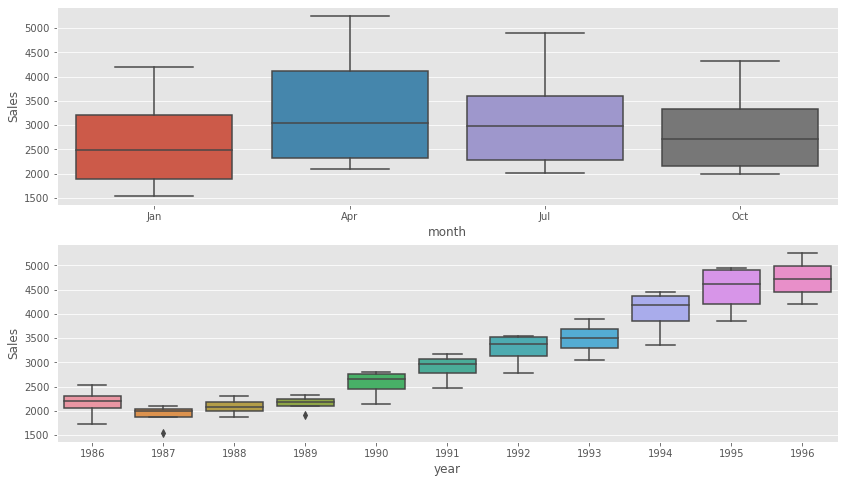

In [24]:
# Boxplot for ever year
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df);

### <font color='purple'><b>Lag plot :

In [28]:
from pandas.plotting import lag_plot

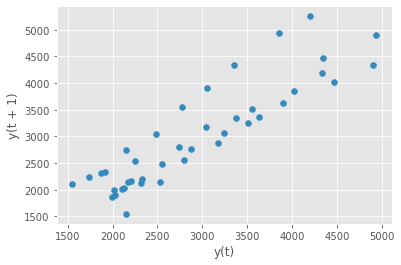

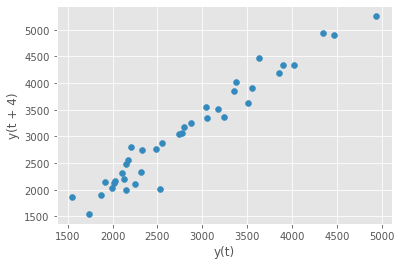

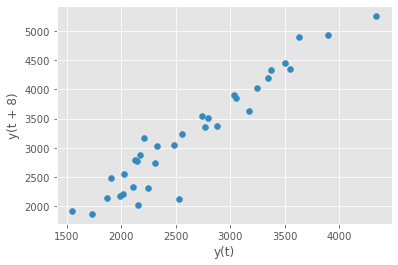

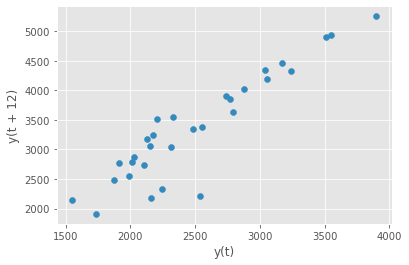

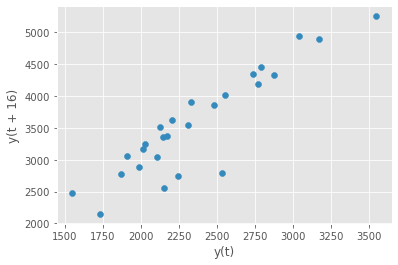

In [29]:
# create a scatter plot
for i in [1, 4, 8, 12, 16]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Sales, lag=i)
    plt.show()

## <font color='purple'><b>Moving Average :

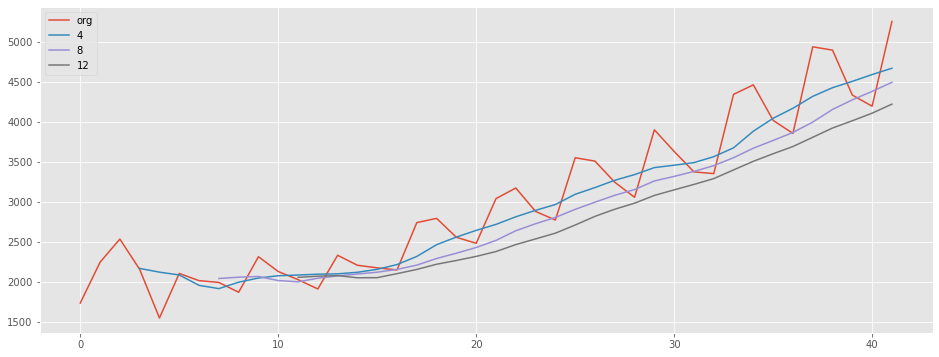

In [31]:
plt.figure(figsize=(16,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

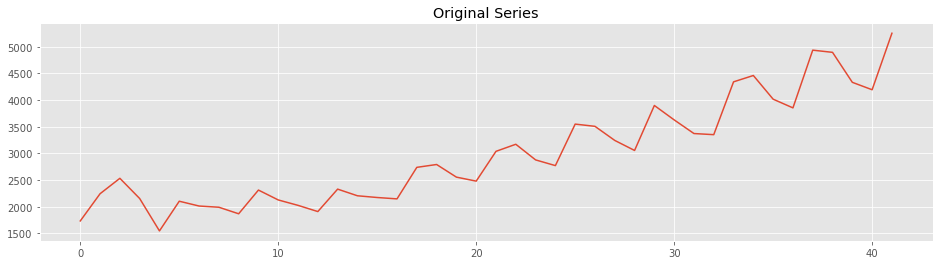

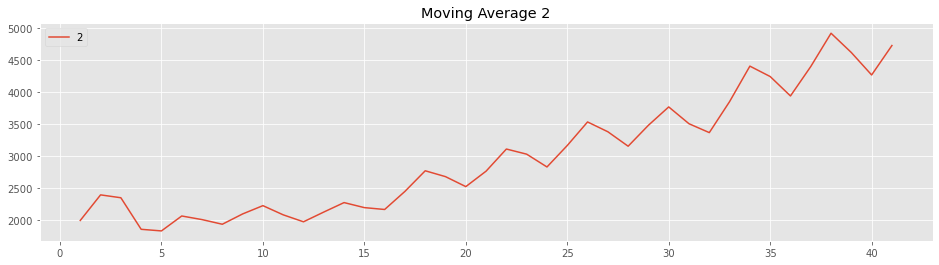

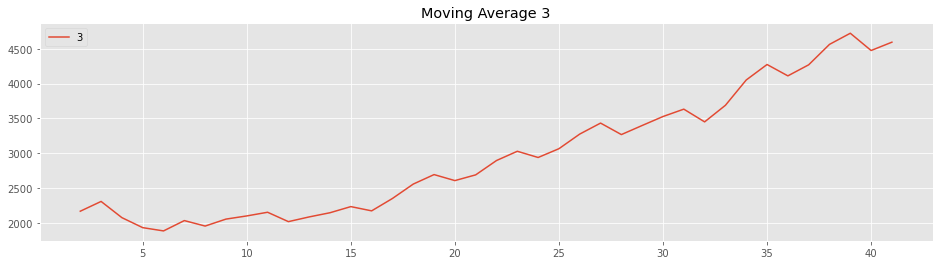

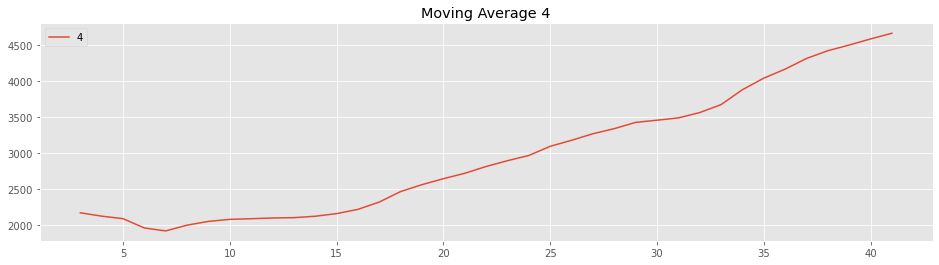

In [32]:
plt.figure(figsize=(16,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,5):
    plt.figure(figsize=(16,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

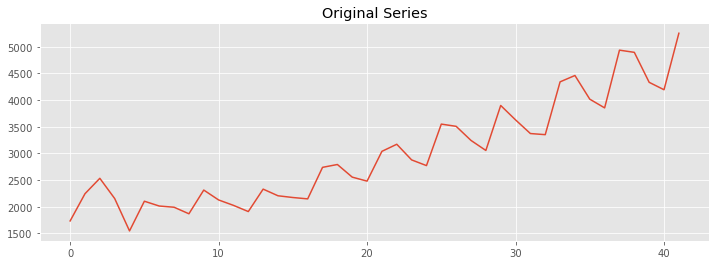

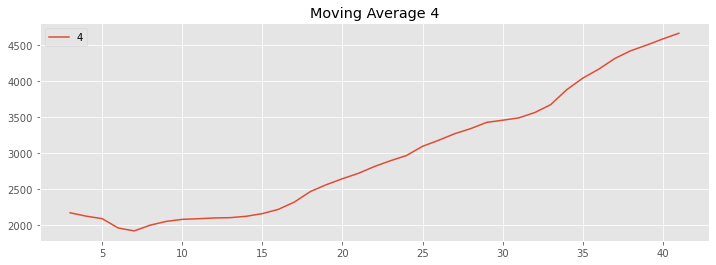

In [33]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()

### <font color='purple'><b>Seasonal Decompose :

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

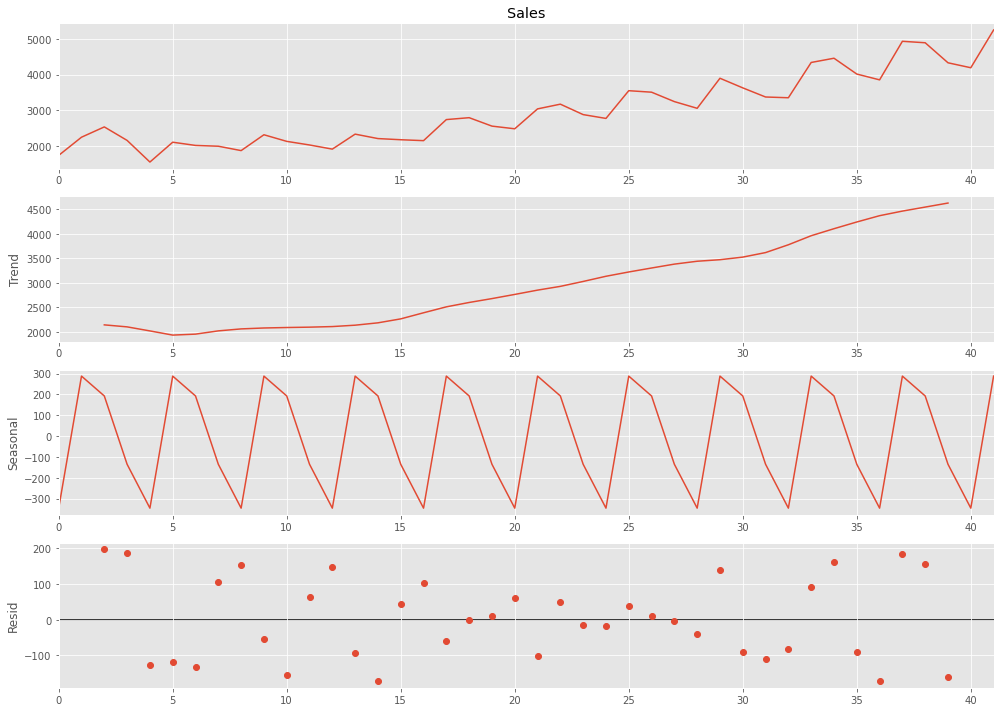

In [35]:
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### <font color='purple'><b>ACF and PACF Plots :

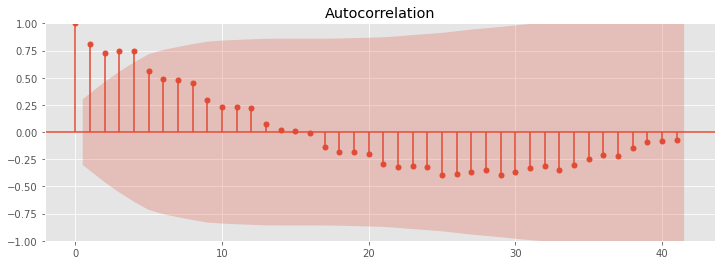

In [36]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Sales,lags=41)
    plt.show()

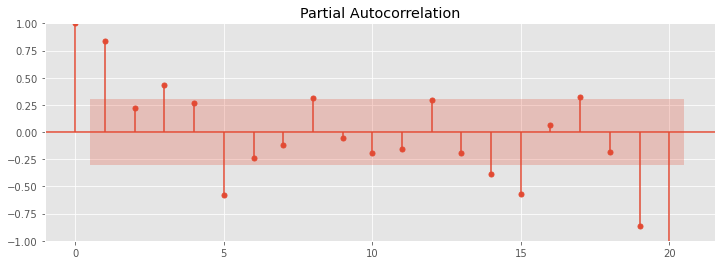

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

## <font color='purple'><b>Sampling Transformation :

### <font color='hotpink'><b>Upsampling w.r.t Month :

In [37]:
upsampled_month = df1.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


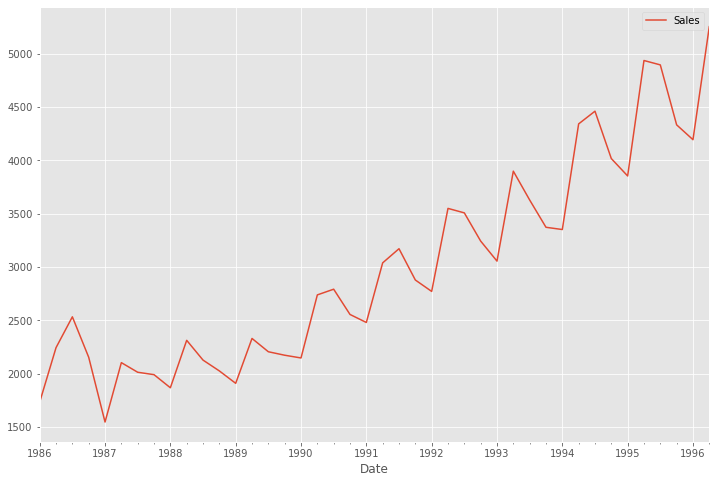

In [38]:
# interplation was done for nan values which we get after doing upsampling by month
interpolated_month = upsampled_month.interpolate(method='linear') 
print(interpolated_month.head(15))
interpolated_month.plot(figsize=(12,8))
plt.show()

In [39]:
interpolated_month.head(10)

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
1986-06-30,2437.523661
1986-07-31,2533.804993
1986-08-31,2407.524328
1986-09-30,2281.243663


### <font color='orange'><b><I>Function to test stationarity :

In [32]:
from statsmodels.tsa.stattools import adfuller

In [45]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

## <font color='purple'><b>Log Transformation :

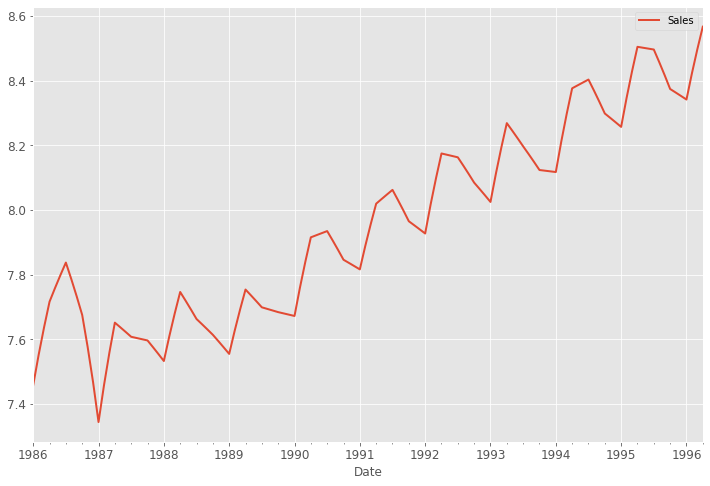

In [40]:
df_log = interpolated_month.copy()
df_log = np.log(interpolated_month)
df_log.plot(figsize=(12,8), linewidth=2, fontsize=12);

In [41]:
rollmean_log = df_log.rolling(window=4).mean()
rollstd_log = df_log.rolling(window=4).std()

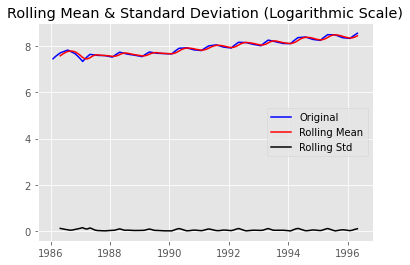

In [42]:
plt.plot(df_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)');

## <font color='purple'><b>Differencing :

In [43]:
df_new = df_log - rollmean_log

In [59]:
df_new.dropna(inplace=True)
df_new.head()

,Sales
Date,
1986-04-30,0.125205
1986-05-31,0.092255
1986-06-30,0.070914
1986-07-31,0.059703
1986-08-31,-0.008897


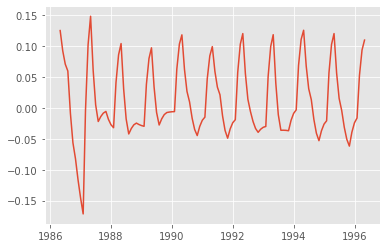

In [52]:
plt.plot(df_new);

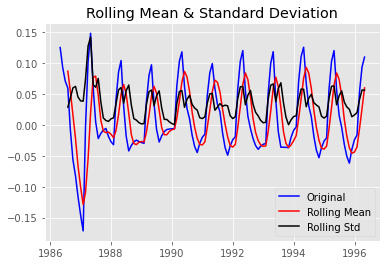

Results of Dickey Fuller Test:
Test Statistic                  -3.807324
p-value                          0.002833
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [60]:
test_stationarity(df_new)

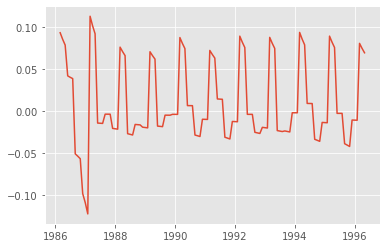

In [47]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff);

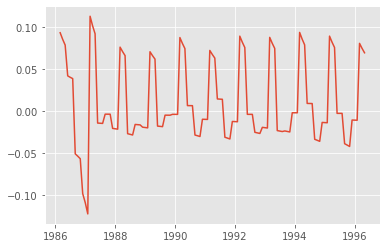

In [48]:
df_log_diff.dropna(inplace=True)
plt.plot(df_log_diff);

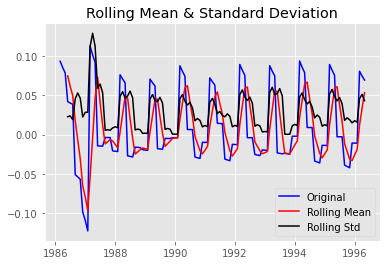

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [53]:
test_stationarity(df_log_diff)

<font color='maroon'><b><I>pvalue is less than 0.5 and also the critical values are close to the test statistic.

## <font color='green'><b>Autoregressive Integrated Moving Averages (ARIMA) :

In [30]:
from statsmodels.tsa.arima.model import ARIMA

### <font color='cyan'><b>Plotting ACF and PACF :

In [31]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

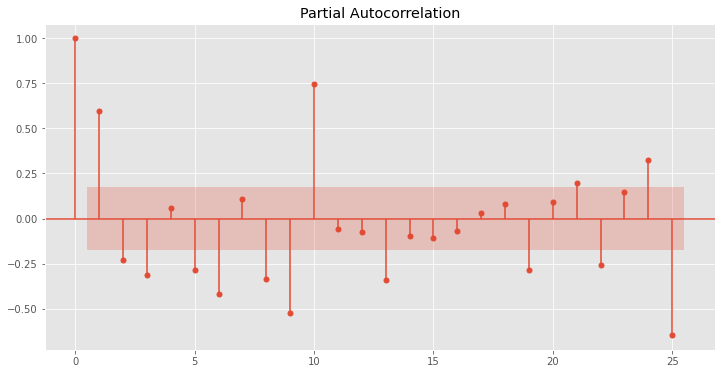

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
pacf1 = plot_pacf(df_log_diff['Sales'],lags=25,ax=ax)

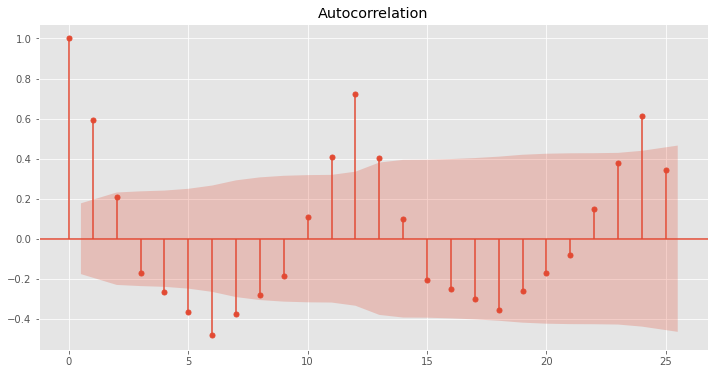

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
acf1 = plot_acf(df_log_diff['Sales'],lags=25,ax=ax)

In [61]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

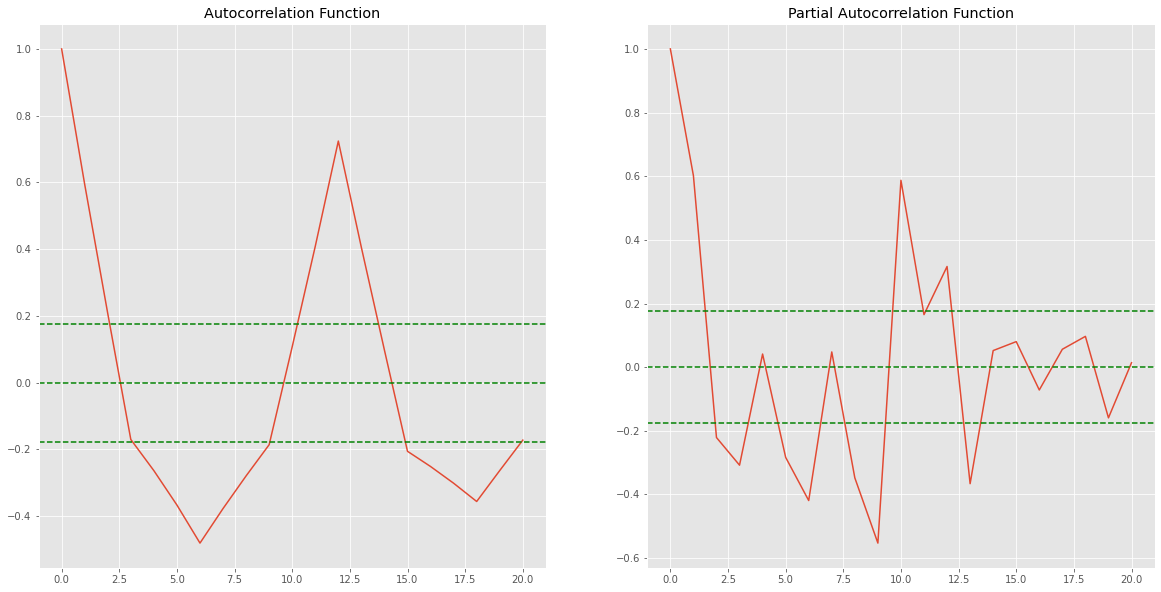

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function');

<font color='maroon'><b><I>From the ACF graph, we can see that curve touches y=0.0 line at x=2. Thus q = 2. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus p = 2.

### <font color='cyan'><b>Split into train and test data with the last 2 years as test data :

In [63]:
train = df_log[:100]
test = df_log[100:]

In [64]:
print('Train:',train.index.min(),train.index.max(),'\n',
'Test:',test.index.min(),test.index.max())

Train: 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test: 1994-05-31 00:00:00 1996-04-30 00:00:00


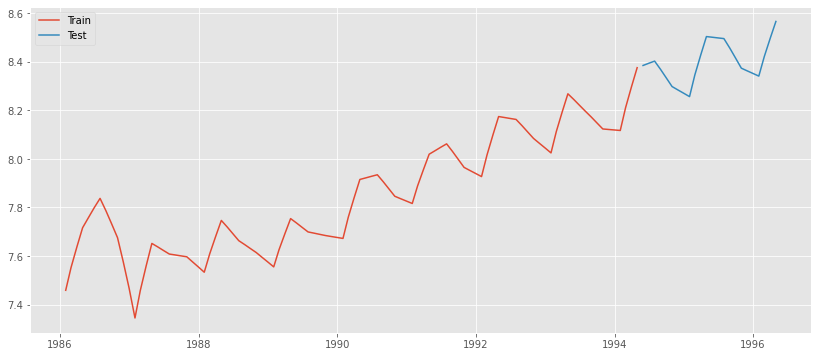

In [65]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>ARIMA model :

In [76]:
model = ARIMA(train,order=(2,1,2))
model = model.fit()
model.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 196.746
Date:                Thu, 22 Dec 2022   AIC                           -383.492
Time:                        19:50:41   BIC                           -370.517
Sample:                    01-31-1986   HQIC                          -378.242
                         - 04-30-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0809      0.166      0.489      0.625      -0.243       0.405
ar.L2         -0.2651      0.181     -1.461      0.144      -0.621       0.091
ma.L1          0.7769      0.074     10.543      0.000       0.632       0.921
ma.L2          0.9823      0.163      6.040      0.000       0.664       1.301
sigma2         0.0010      0.000      4.707      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                84.14
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.17
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <font color='cyan'><b>Prediction :

In [77]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,type='levels')
print(np.exp(pred))

1994-05-31    4324.148873
1994-06-30    4241.297478
1994-07-31    4239.290082
1994-08-31    4260.923884
1994-09-30    4263.214339
1994-10-31    4257.650720
1994-11-30    4256.594375
1994-12-31    4257.982674
1995-01-31    4258.375139
1995-02-28    4258.038792
1995-03-31    4257.907541
1995-04-30    4257.986078
1995-05-31    4258.027227
1995-06-30    4258.009737
1995-07-31    4257.997413
1995-08-31    4258.001053
1995-09-30    4258.004614
1995-10-31    4258.003937
1995-11-30    4258.002939
1995-12-31    4258.003037
1996-01-31    4258.003310
1996-02-29    4258.003306
1996-03-31    4258.003233
1996-04-30    4258.003228
Freq: M, Name: predicted_mean, dtype: float64


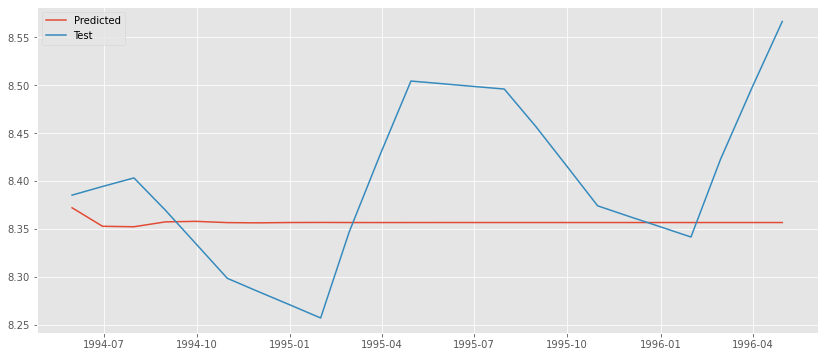

In [78]:
plt.figure(figsize=(14,6))
plt.plot(pred, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

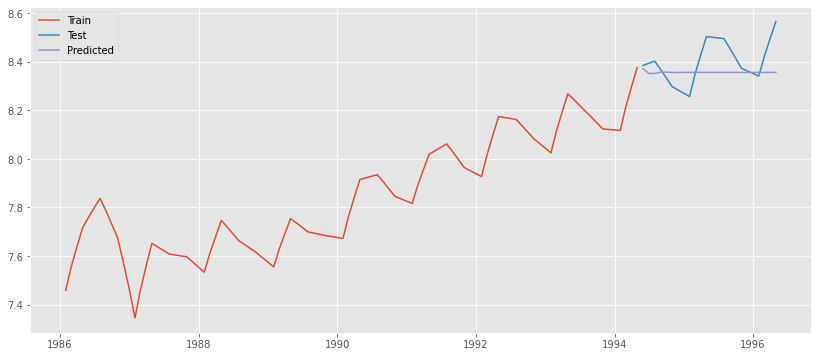

In [164]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(np.exp(pred),np.exp(test)))

print('Root Mean Squared Error of ARIMA model =',rmse)

Root Mean Squared Error of ARIMA model = 414.7114881067264


<font color='maroon'><b><I>Arima model did not capture the trend and seasonality properly.

## <font color='green'><b>Seasonal Auto Regressive Integrated Moving Average (SARIMA) :

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [143]:
df_log_seas = df_log_diff.diff(4).dropna()
df_log_seas.head()

,Sales
Date,
1986-06-30,-0.053206
1986-07-31,-0.046767
1986-08-31,-0.129890
1986-09-30,-0.095872
1986-10-31,-0.097248


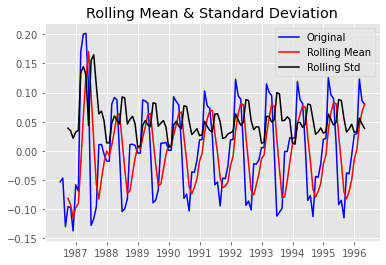

Results of Dickey Fuller Test:
Test Statistic                  -5.322744
p-value                          0.000005
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [144]:
test_stationarity(df_log_seas)

### <font color='cyan'><b>Plotting ACF and PACF :

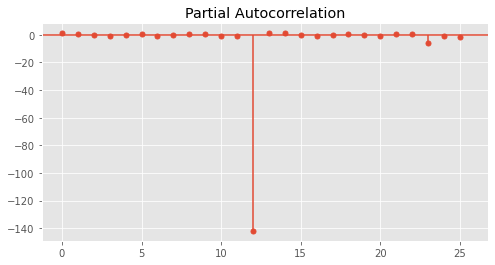

In [163]:
fig, ax = plt.subplots(figsize=(8,4))
pacf_s = plot_pacf(df_log_seas['Sales'],lags=25,ax=ax)

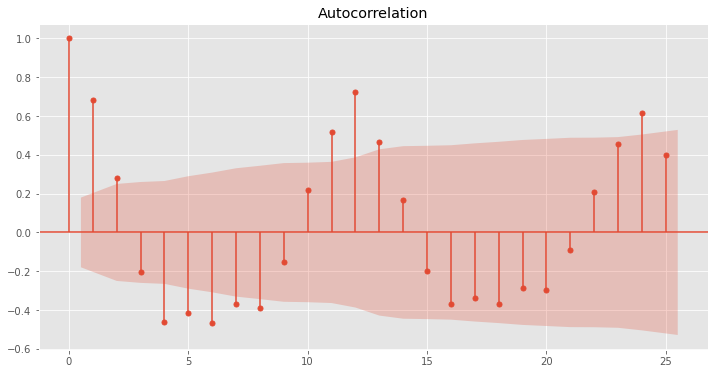

In [155]:
fig, ax = plt.subplots(figsize=(12,6))
acf_s = plot_acf(df_log_seas['Sales'],lags=25,ax=ax)

In [156]:
lag_acf_s = acf(df_log_seas, nlags=20)
lag_pacf_s = pacf(df_log_seas, nlags=20, method='ols')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

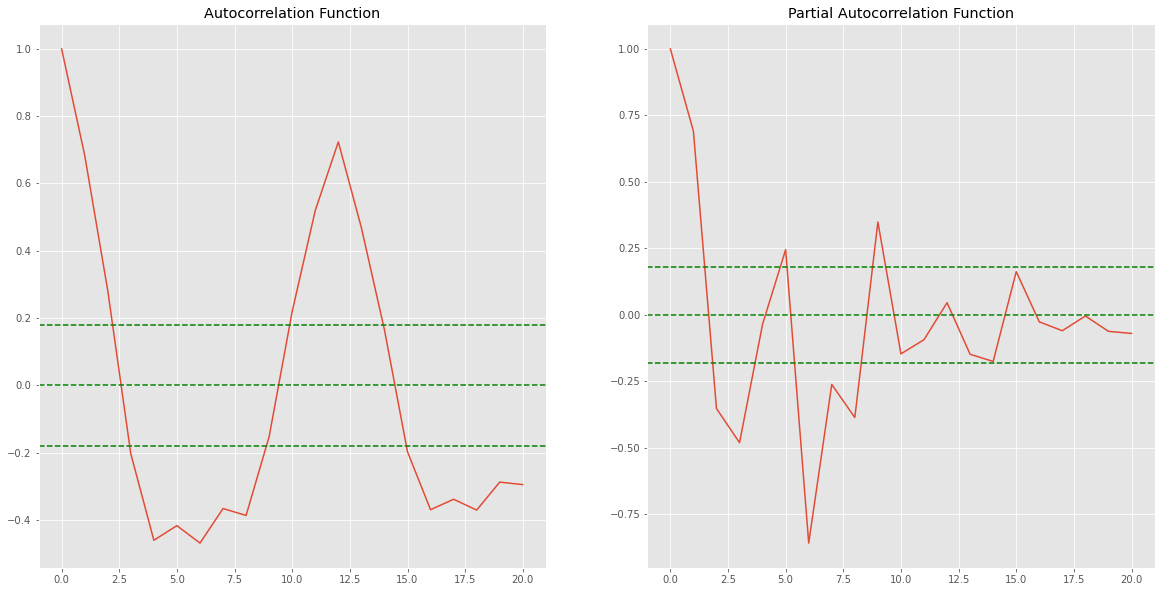

In [157]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf_s)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf_s)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_log_seas)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

<font color='maroon'><b><I>From the above plots the seasonal components for order of AutoRegression(AR) Q=2 and order of Moving Average(MA) P=1.

### <font color='cyan'><b>SARIMA model :

In [168]:
model_sr = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,2,12))
model_sr = model_sr.fit()
model_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Sales   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 217.848
Date:                                 Fri, 23 Dec 2022   AIC                           -423.697
Time:                                         01:56:43   BIC                           -408.901
Sample:                                     01-31-1986   HQIC                          -417.739
                                          - 04-30-1994                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5421      0.145      3.750      0.000       0.259       0.825
ma.L1          0.1882      0.278      0.677      0.498      -0.356       0.733
ar.S.L12       0.1429      1.825      0.078      0.938      -3.433       3.719
ma.S.L12      -0.1583      1.776     -0.089      0.929      -3.638       3.322
ma.S.L24      -0.0609      0.279     -0.218      0.827      -0.609       0.487
sigma2         0.0004   3.61e-05     10.702      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               415.60
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <font color='cyan'><b>Prediction :

In [169]:
preds = model_sr.predict(start=start,end=end,type='levels')
print(np.exp(preds))

1994-05-31    4259.496081
1994-06-30    4170.616739
1994-07-31    4078.222651
1994-08-31    3983.170738
1994-09-30    3887.179925
1994-10-31    3790.680592
1994-11-30    3783.852786
1994-12-31    3776.919369
1995-01-31    3769.939033
1995-02-28    4140.650376
1995-03-31    4511.336625
1995-04-30    4882.005720
1995-05-31    4795.409899
1995-06-30    4701.642081
1995-07-31    4603.853940
1995-08-31    4495.984727
1995-09-30    4387.066554
1995-10-31    4277.577991
1995-11-30    4265.514480
1995-12-31    4253.259188
1996-01-31    4240.873709
1996-02-29    4655.859004
1996-03-31    5070.801345
1996-04-30    5485.712718
Freq: M, Name: predicted_mean, dtype: float64


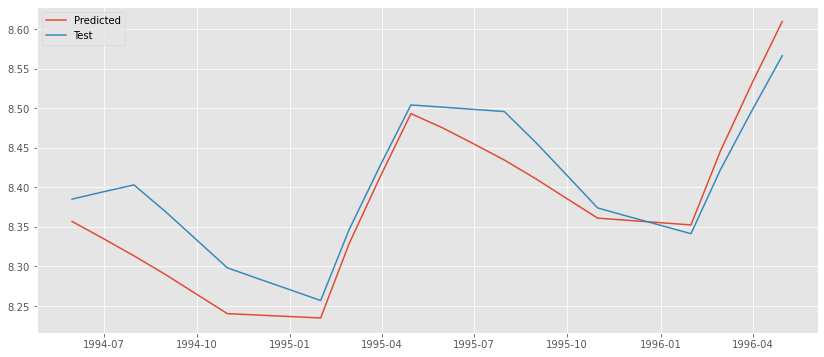

In [170]:
plt.figure(figsize=(14,6))
plt.plot(preds, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

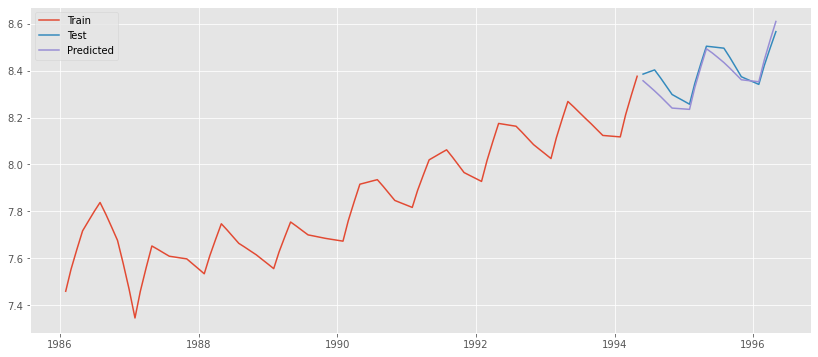

In [161]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [171]:
df['Sales'].mean()

2994.353307723999

In [162]:
rmse_s = sqrt(mean_squared_error(np.exp(preds),np.exp(test)))

print('Root Mean Squared Error of SARIMA model =',rmse_s)

Root Mean Squared Error of SARIMA model = 186.82214078063558


<font color='maroon'><b><I>Sarima model performs better.

## <font color='green'><b>Holt-Winters Forecasting :

In [172]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### <font color='magenta'><b>Single Exponential Smoothing :

In [173]:
dfh = interpolated_month.copy()

In [174]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

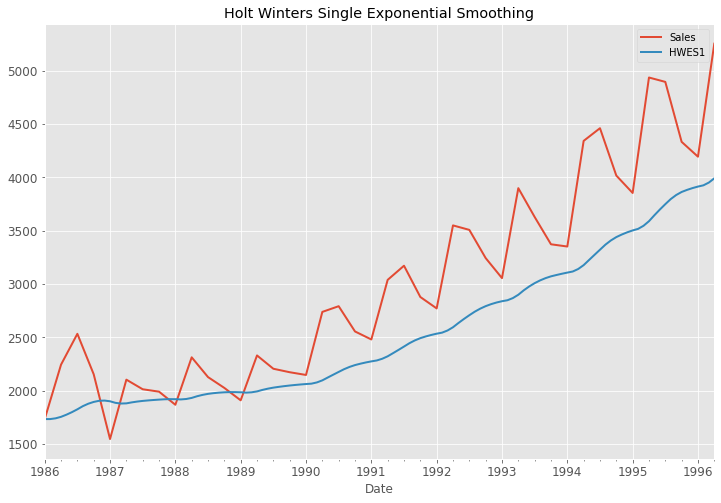

In [175]:
dfh['HWES1'] = SimpleExpSmoothing(dfh['Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
dfh[['Sales','HWES1']]
dfh.plot(figsize=(12,8), linewidth=2, fontsize=12,title='Holt Winters Single Exponential Smoothing');

<font color='maroon'><b><I>As can be seen Single Exponential Smoothing do not capture trend and seasonality.

### <font color='magenta'><b>Double Exponential Smoothing :

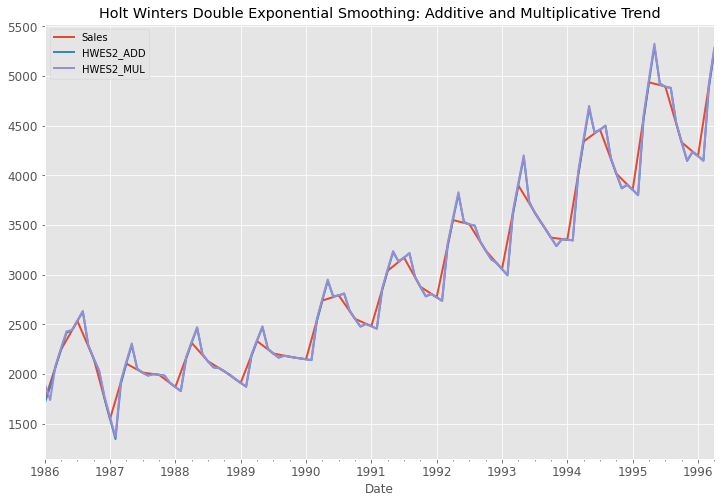

In [178]:
dfh['HWES2_ADD'] = ExponentialSmoothing(dfh['Sales'],trend='add').fit().fittedvalues
dfh['HWES2_MUL'] = ExponentialSmoothing(dfh['Sales'],trend='mul').fit().fittedvalues
dfh[['Sales','HWES2_ADD','HWES2_MUL']].plot(figsize=(12,8), linewidth=2, fontsize=12,
                                            title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

<font color='maroon'><b><I>Dounble Exponential Smoothing captures the trend but not the seasonality.

### <font color='magenta'><b>Triple Exponential Smoothing :

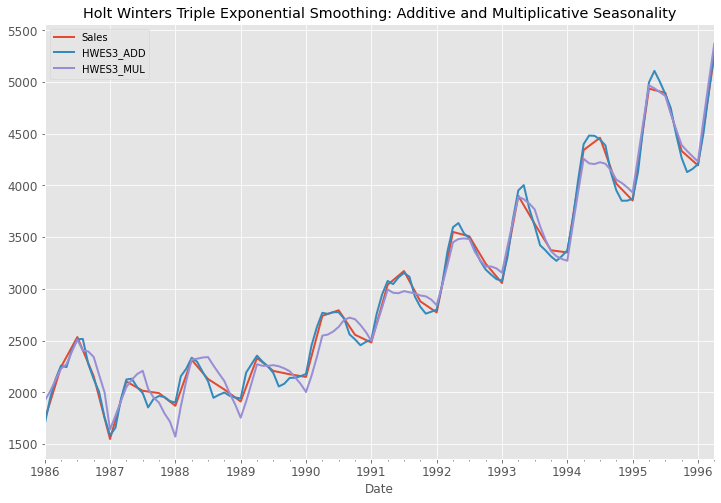

In [179]:
dfh['HWES3_ADD'] = ExponentialSmoothing(dfh['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
dfh['HWES3_MUL'] = ExponentialSmoothing(dfh['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
dfh[['Sales','HWES3_ADD','HWES3_MUL']].plot(figsize=(12,8), linewidth=2, fontsize=12,
                                                 title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

<font color='maroon'><b><I>Triple Exponential Smoothing captures both trend and seasonality.

### <font color='cyan'><b>Split into train and test data :

In [181]:
trainh = dfh['Sales'][:100]
testh = dfh['Sales'][100:]
print('Train:',trainh.index.min(),trainh.index.max(),'\n',
'Test:',testh.index.min(),testh.index.max())

Train: 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test: 1994-05-31 00:00:00 1996-04-30 00:00:00


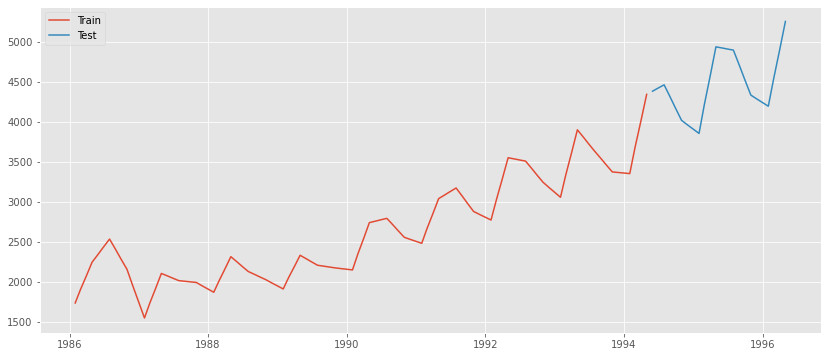

In [182]:
plt.figure(figsize=(14,6))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>TES model :

### <font color='hotpink'><b>With Multiplicative Seasonality :

In [183]:
model_h = ExponentialSmoothing(trainh,trend='mul',seasonal='mul',seasonal_periods=12)
model_h = model_h.fit()
model_h.summary()

Dep. Variable:,Sales,No. Observations:,100
Model:,ExponentialSmoothing,SSE,352181.322
Optimized:,True,AIC,848.673
Trend:,Multiplicative,BIC,890.356
Seasonal:,Multiplicative,AICC,857.118
Seasonal Periods:,12,Date:,"Fri, 23 Dec 2022"
Box-Cox:,False,Time:,02:19:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596438,alpha,True
smoothing_trend,0.9596209,beta,True


### <font color='cyan'><b>Prediction :

In [184]:
starth = len(trainh)
endh = len(trainh)+len(testh)-1
pred3 = model_h.predict(start=starth,end=endh)
print(pred3)

1994-05-31    4352.269766
1994-06-30    4358.569290
1994-07-31    4356.694893
1994-08-31    4240.984855
1994-09-30    4090.254658
1994-10-31    3923.433449
1994-11-30    3758.999681
1994-12-31    3595.156538
1995-01-31    3449.011971
1995-02-28    3737.996123
1995-03-31    4063.210182
1995-04-30    4397.988842
1995-05-31    4407.852763
1995-06-30    4414.232738
1995-07-31    4412.334404
1995-08-31    4295.146629
1995-09-30    4142.491451
1995-10-31    3973.539762
1995-11-30    3807.006004
1995-12-31    3641.070414
1996-01-31    3493.059430
1996-02-29    3785.734208
1996-03-31    4115.101589
1996-04-30    4454.155719
Freq: M, dtype: float64


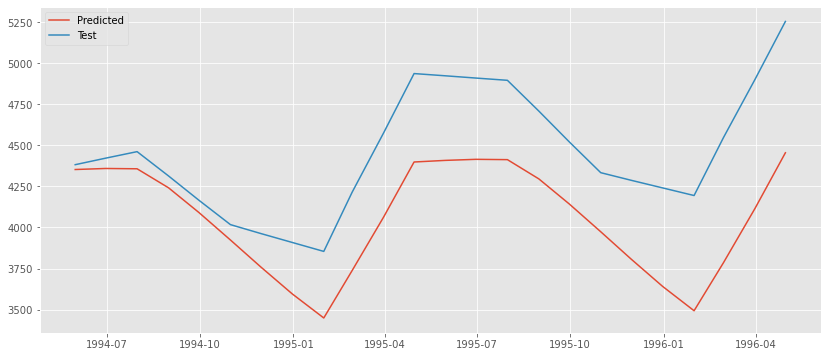

In [185]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

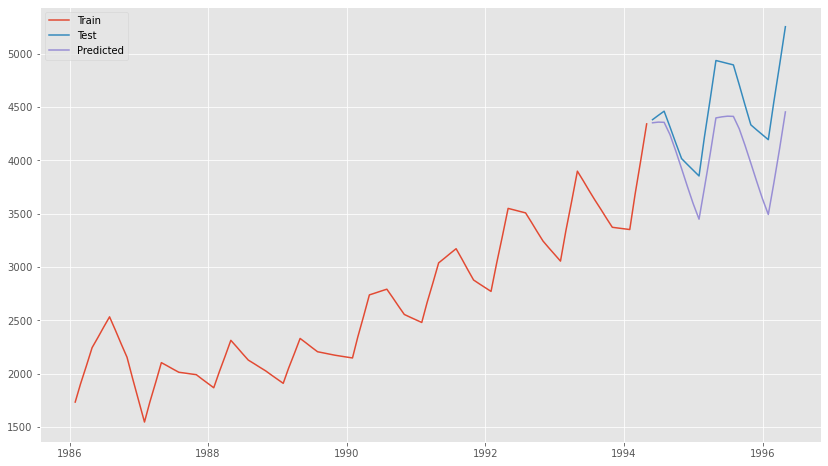

In [186]:
plt.figure(figsize=(14,8))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.plot(pred3, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [193]:
rmse3 = sqrt(mean_squared_error(pred3,testh))
print('Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Multiplicative Seasonality =',rmse3)

Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Multiplicative Seasonality = 466.20134039155687


### <font color='hotpink'><b>With Additive Seasonality :

In [188]:
model_h1 = ExponentialSmoothing(trainh,trend='add',seasonal='add',seasonal_periods=12)
model_h1 = model_h1.fit()
model_h1.summary()

Dep. Variable:,Sales,No. Observations:,100
Model:,ExponentialSmoothing,SSE,389553.078
Optimized:,True,AIC,858.759
Trend:,Additive,BIC,900.441
Seasonal:,Additive,AICC,867.203
Seasonal Periods:,12,Date:,"Fri, 23 Dec 2022"
Box-Cox:,False,Time:,02:22:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9115497,alpha,True
smoothing_trend,0.8935641,beta,True


### <font color='cyan'><b>Prediction :

In [189]:
predh = model_h1.predict(start=starth,end=endh)
print(predh)

1994-05-31    4491.759590
1994-06-30    4680.678919
1994-07-31    4851.115744
1994-08-31    4917.297221
1994-09-30    4906.815442
1994-10-31    4838.099241
1994-11-30    4764.044625
1994-12-31    4682.351110
1995-01-31    4642.732300
1995-02-28    4918.110437
1995-03-31    5217.892305
1995-04-30    5555.314400
1995-05-31    5701.531343
1995-06-30    5890.450673
1995-07-31    6060.887497
1995-08-31    6127.068975
1995-09-30    6116.587195
1995-10-31    6047.870994
1995-11-30    5973.816379
1995-12-31    5892.122864
1996-01-31    5852.504054
1996-02-29    6127.882190
1996-03-31    6427.664059
1996-04-30    6765.086154
Freq: M, dtype: float64


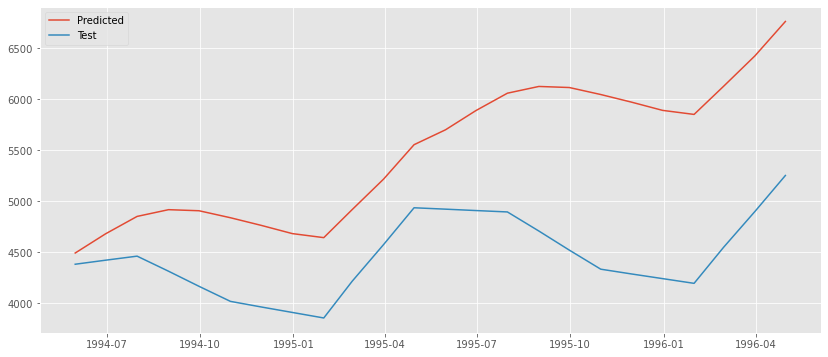

In [190]:
plt.figure(figsize=(14,6))
plt.plot(predh, label='Predicted')
plt.plot(testh, label='Test')
plt.legend(loc='best')
plt.show()

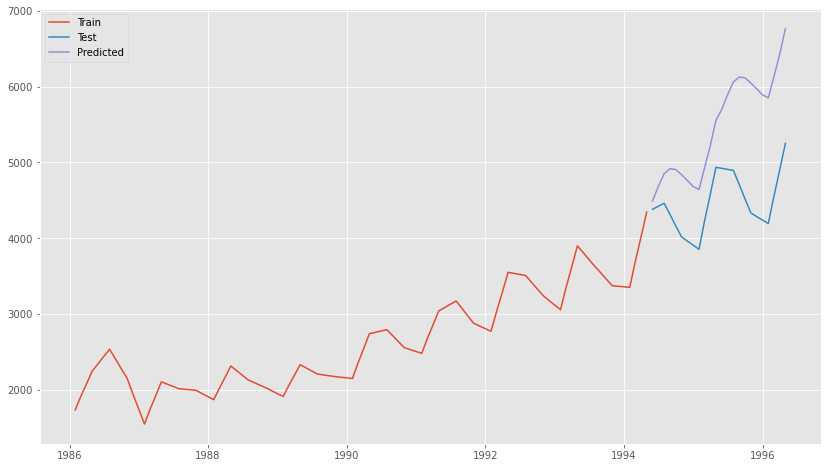

In [191]:
plt.figure(figsize=(14,8))
plt.plot(trainh, label='Train')
plt.plot(testh, label='Test')
plt.plot(predh, label='Predicted')
plt.legend(loc='best')
plt.show()

### <font color='cyan'><b>RMSE :

In [192]:
rmseh = sqrt(mean_squared_error(predh,testh))
print('Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Additive Seasonality =',rmseh)

Root Mean Squared Error of Holt-Winters Triple Exponential Smoothing model with Additive Seasonality = 1133.8474008506066


<font color='maroon'><b><I>Sarima model has performed better than Holt-Winters' models.

## <font color='peach'><b>Ordinary Least Square Models :

### <font color='orange'><b><I>Creating Dummy Variables of the Categorical Feature Month of Date Time feature :

In [194]:
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


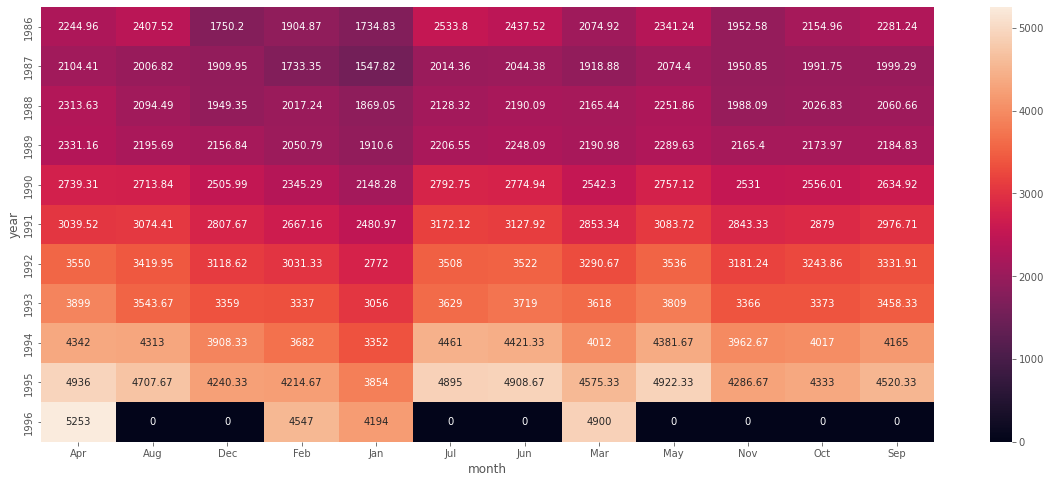

In [196]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g");

### <font color='orange'><b><I>Split into train and test data :

In [218]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

### <font color='hotpink'><b>Linear Model :

In [198]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668943

In [199]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     397.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.03e-36
Time:                        03:21:41   Log-Likelihood:                -705.92
No. Observations:                 100   AIC:                             1416.
Df Residuals:                      98   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1642.3384     57.309     28.658      0.000    1528.611    1756.065
t             19.6334      0.985     19.928      0.000      17.678      21.589
==============================================================================
Omnibus:                        7.535   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.789
Skew:                           0.683   Prob(JB):                       0.0204
Kurtosis:                       2.929   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='hotpink'><b>Exponential Model :

In [200]:
Exp = smf.ols('log_sales~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

530.3268025099009

In [201]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.20e-36
Time:                        03:22:49   Log-Likelihood:                 84.607
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      98   BIC:                            -160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4782      0.021    353.829      0.000       7.436       7.520
t              0.0073      0.000     20.162      0.000       0.007       0.008
==============================================================================
Omnibus:                        6.147   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.627
Skew:                           0.561   Prob(JB):                       0.0600
Kurtosis:                       3.301   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='hotpink'><b>Quadratic Model :

In [202]:
Quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.29418344986647

In [203]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     325.2
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           9.85e-44
Time:                        03:23:52   Log-Likelihood:                -684.82
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      97   BIC:                             1383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2022.9480     70.858     28.549      0.000    1882.314    2163.582
t             -2.7554      3.238     -0.851      0.397      -9.183       3.672
t_squared      0.2217      0.031      7.136      0.000       0.160       0.283
==============================================================================
Omnibus:                        3.492   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.371
Skew:                           0.193   Prob(JB):                        0.306
Kurtosis:                       2.352   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color='hotpink'><b>Additive Seasonality Model :

In [204]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483788

In [205]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.6210
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.806
Time:                        03:24:52   Log-Likelihood:                -783.17
No. Observations:                 100   AIC:                             1590.
Df Residuals:                      88   BIC:                             1622.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2431.1678     60.077     40.467      0.000    2311.777    2550.559
Jan         -112.1065    208.114     -0.539      0.591    -525.689     301.476
Feb           98.7249    208.114      0.474      0.636    -314.858     512.308
Mar          309.5564    208.114      1.487      0.140    -104.026     723.139
Apr          520.3878    208.114      2.500      0.014     106.805     933.971
May          336.7034    219.714      1.532      0.129     -99.932     773.339
Jun          326.8245    219.714      1.488      0.140    -109.811     763.460
Jul          316.9457    219.714      1.443      0.153    -119.690     753.581
Aug          250.8819    219.714      1.142      0.257    -185.753     687.517
Sep          184.8182    219.714      0.841      0.403    -251.817     621.453
Oct          118.7544    219.714      0.540      0.590    -317.881     555.390
Nov           66.1439    219.714      0.301      0.764    -370.491     502.779
Dec           13.5333    219.714      0.062      0.951    -423.102     450.168
==============================================================================
Omnibus:                       30.612   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.038
Skew:                           0.459   Prob(JB):                       0.0109
Kurtosis:                       1.848   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Quadratic with Additive Seasonality Model :

In [206]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))

In [207]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           8.95e-52
Time:                        03:25:43   Log-Likelihood:                -632.59
No. Observations:                 100   AIC:                             1293.
Df Residuals:                      86   BIC:                             1330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1865.7939     41.512     44.946      0.000    1783.271    1948.316
t             -2.9439      2.056     -1.432      0.156      -7.032       1.144
t_squared      0.2253      0.020     11.418      0.000       0.186       0.265
Jan         -159.7690     46.717     -3.420      0.001    -252.640     -66.898
Feb           31.7000     46.733      0.678      0.499     -61.202     124.602
Mar          222.7184     46.754      4.764      0.000     129.774     315.663
Apr          413.2862     46.781      8.834      0.000     320.288     506.284
May          372.3785     49.451      7.530      0.000     274.074     470.683
Jun          344.0384     49.465      6.955      0.000     245.706     442.371
Jul          315.2478     49.481      6.371      0.000     216.884     413.612
Aug          229.8216     49.499      4.643      0.000     131.421     328.222
Sep          143.9448     49.519      2.907      0.005      45.505     242.385
Oct           57.6174     49.541      1.163      0.248     -40.867     156.102
Nov          -15.7075     49.565     -0.317      0.752    -114.240      82.825
Dec          -89.4829     49.592     -1.804      0.075    -188.068       9.102
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.611
Skew:                          -0.001   Prob(JB):                        0.737
Kurtosis:                       2.617   Cond. No.                     6.72e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Multiplicative Seasonality Model :

In [208]:
Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.7944171920326

In [209]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.6657
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.767
Time:                        03:26:24   Log-Likelihood:                 6.6723
No. Observations:                 100   AIC:                             10.66
Df Residuals:                      88   BIC:                             41.92
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2447      0.022    324.766      0.000       7.200       7.289
Jan            0.4719      0.077      6.107      0.000       0.318       0.626
Feb            0.5592      0.077      7.236      0.000       0.406       0.713
Mar            0.6393      0.077      8.273      0.000       0.486       0.793
Apr            0.7134      0.077      9.232      0.000       0.560       0.867
May            0.6582      0.082      8.068      0.000       0.496       0.820
Jun            0.6547      0.082      8.025      0.000       0.493       0.817
Jul            0.6508      0.082      7.977      0.000       0.489       0.813
Aug            0.6277      0.082      7.694      0.000       0.466       0.790
Sep            0.6038      0.082      7.401      0.000       0.442       0.766
Oct            0.5791      0.082      7.098      0.000       0.417       0.741
Nov            0.5558      0.082      6.812      0.000       0.394       0.718
Dec            0.5309      0.082      6.508      0.000       0.369       0.693
==============================================================================
Omnibus:                       74.329   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.756
Skew:                           0.261   Prob(JB):                       0.0125
Kurtosis:                       1.648   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='hotpink'><b>Multiplicative Seasonality and Additive Trend Model :

In [210]:
Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

396.41978173827204

In [211]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     61.10
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.29e-37
Time:                        03:27:07   Log-Likelihood:                 114.86
No. Observations:                 100   AIC:                            -203.7
Df Residuals:                      87   BIC:                            -169.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9000      0.015    450.015      0.000       6.870       6.931
t              0.0074      0.000     25.888      0.000       0.007       0.008
Jan            0.4543      0.026     17.240      0.000       0.402       0.507
Feb            0.5342      0.026     20.263      0.000       0.482       0.587
Mar            0.6069      0.026     23.011      0.000       0.554       0.659
Apr            0.6736      0.026     25.526      0.000       0.621       0.726
May            0.6553      0.028     23.563      0.000       0.600       0.711
Jun            0.6445      0.028     23.171      0.000       0.589       0.700
Jul            0.6332      0.028     22.759      0.000       0.578       0.688
Aug            0.6027      0.028     21.656      0.000       0.547       0.658
Sep            0.5714      0.028     20.523      0.000       0.516       0.627
Oct            0.5392      0.028     19.360      0.000       0.484       0.595
Nov            0.5085      0.028     18.246      0.000       0.453       0.564
Dec            0.4763      0.028     17.077      0.000       0.421       0.532
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.352
Skew:                           0.801   Prob(JB):                     0.000171
Kurtosis:                       4.264   Cond. No.                     7.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.73e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color='brown'><b>Comparison of OLS Models :

In [214]:
# compare the RMSE of all the models in a dataframe
rmse_df = pd.DataFrame({'Model': ['Linear', 
                                    'Exponential', 
                                    'Quadratic', 
                                    'Additive Seasonality', 
                                    'Quadratic with Additive Seasonality', 
                                    'Multiplicative seasonality', 
                                    'Multiplicative seasonality & additive trend'], 
                        'RMSE': [rmse_linear, 
                                rmse_Exp, 
                                rmse_Quad, 
                                rmse_add_sea, 
                                rmse_add_sea_quad, 
                                rmse_Mult_sea, 
                                rmse_Mult_add_sea]})
rmse_df = rmse_df.sort_values(by='RMSE').reset_index(drop=True)
rmse_df

,Model,RMSE
0,Quadratic with Additive Seasonality,225.804988
1,Quadratic,371.294183
2,Multiplicative seasonality & additive trend,396.419782
3,Exponential,530.326803
4,Linear,686.874086
5,Additive Seasonality,1837.787972
6,Multiplicative seasonality,1904.794417


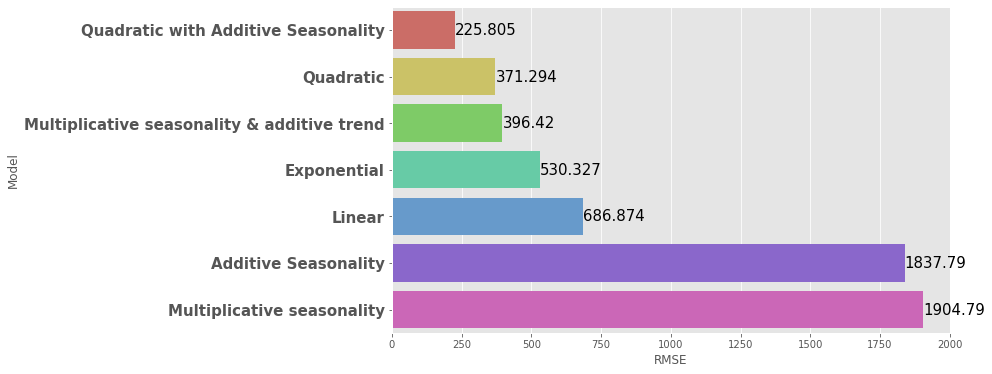

In [217]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=rmse_df,x='RMSE',y='Model',palette='hls',ci=None)
plt.yticks(fontsize=15,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

## <font color='blue'><b>Comparison of all Models :

In [219]:
data = {'Models':['ARIMA','SARIMA','Holt-Winters Triple Exponential Smoothing with Multiplicative Seasonality',
                  'Holt-Winters Triple Exponential Smoothing with Additive Seasonality','Linear','Exponential',
                  'Quadratic','Additive Seasonality','Quadratic with Additive Seasonality','Multiplicative seasonality',
                  'Multiplicative seasonality & additive trend'],
       'Root Mean Squared Error':[rmse,rmse_s,rmse3,rmseh,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,
                                  rmse_Mult_sea,rmse_Mult_add_sea]}
Models = pd.DataFrame(data)
Models = Models.sort_values('Root Mean Squared Error').reset_index(drop=True)
Models

,Models,Root Mean Squared Error
0,SARIMA,186.822141
1,Quadratic with Additive Seasonality,225.804988
2,Quadratic,371.294183
3,Multiplicative seasonality & additive trend,396.419782
4,ARIMA,414.711488
5,Holt-Winters Triple Exponential Smoothing with...,466.201340
6,Exponential,530.326803
7,Linear,686.874086
8,Holt-Winters Triple Exponential Smoothing with...,1133.847401
9,Additive Seasonality,1837.787972


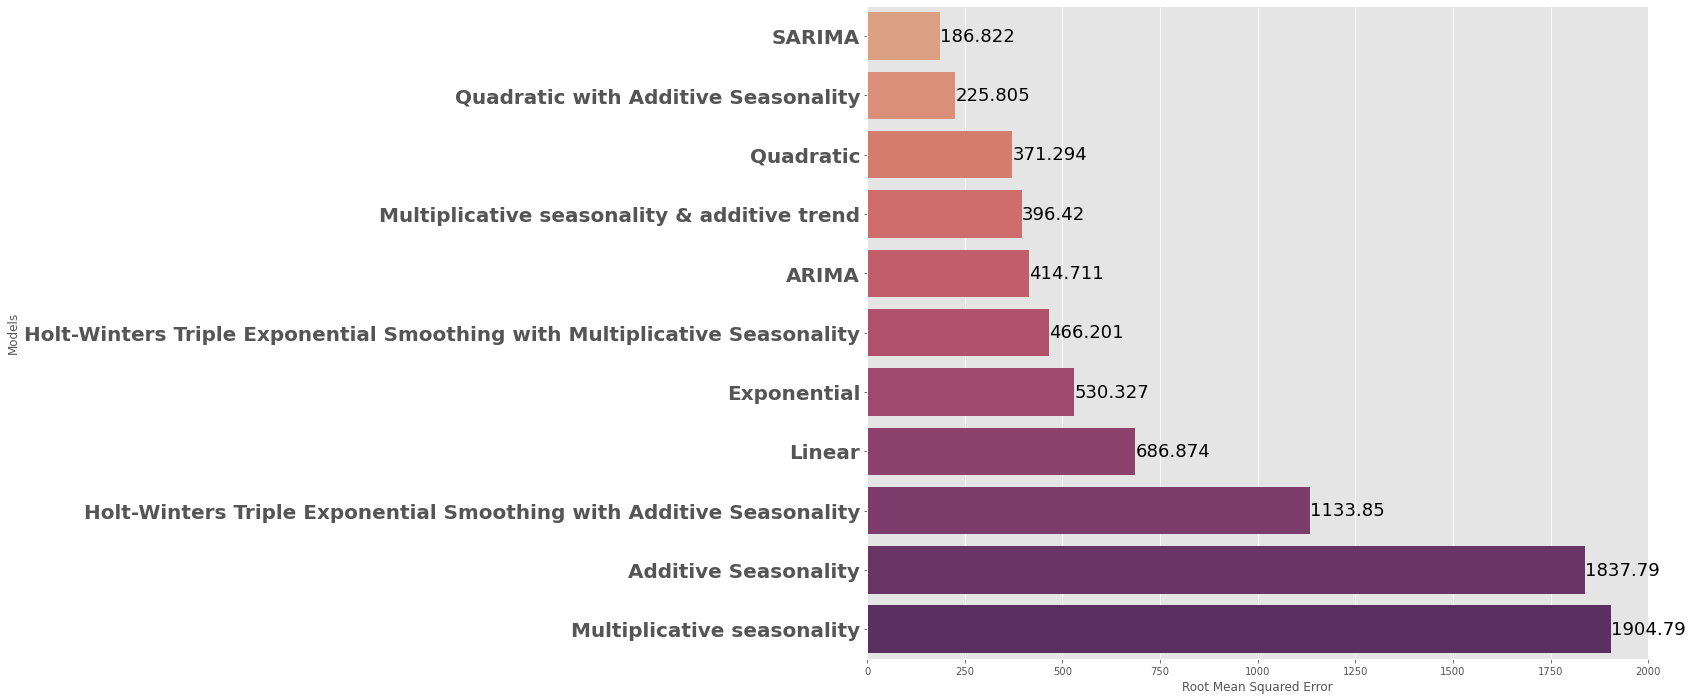

In [229]:
plt.figure(figsize=(14,12))
ax = sns.barplot(data=Models,x='Root Mean Squared Error',y='Models',palette='flare',ci=None)
plt.yticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='maroon'><b><I>SARIMA model has the least RMSE amongst the models listed here.